In [14]:
import numpy as np
from sympy import symbols, Matrix, init_printing

init_printing() 

t = symbols('t')

# Condition for a minimum jerk trajectory according to the Euler-Lagrange equation is that
# 6th derivative of position P must be 0.
# Hence the trajectory follows a 5-th order polynomial of the form 
# c_5*(t**5) + c_4*(t**4) + c_3*(t**3) + c_2*(t**2) + c_1*(t) + c_0


# The 5-th order polynomial equation is given in b = Ax as follows:
# [P_i; V_i; A_i; P_f; V_f; A_f] = [
    #  [0,        0,          0,      0,      0, 1],
    #  [0,        0,          0,      0,      1, 0],
    #  [0,        0,          0,      2,      0, 0],
    #  [t**5,     t**4,       t**3,   t**2,   t, 1],
    #  [5*t**4,   4*t**3,     3*t**2, 2*t,    1, 0],
    #  [20*t**3,  12*t**2,    6*t,    2,      0, 0], 
# ] 
# * [c_5, c_4, c_3, c_2, c_1, c_0]

mat = Matrix([  [0,        0,          0,      0,      0, 1],
                [0,        0,          0,      0,      1, 0],
                [0,        0,          0,      2,      0, 0],
                [t**5,     t**4,       t**3,   t**2,   t, 1],
                [5*t**4,   4*t**3,     3*t**2, 2*t,    1, 0],
                [20*t**3,  12*t**2,    6*t,    2,      0, 0],
                    ])

P_i, V_i, A_i, P_f, V_f, A_f = symbols(['P_i', 'V_i', 'A_i', 'P_f', 'V_f', 'A_f'])

boundary_cond_mat = Matrix([P_i, V_i, A_i, P_f, V_f, A_f])

# We the invert the A, and get the equation as x = inv(A) * b as follows: */
# [c_5, c_4, c_3, c_2, c_1, c_0] = [
#      [-6/t**5, -3/t**4, -1/(2*t**3), 6/t**5, -3/t**4, 1/(2*t**3)], 
#      [15/t**4, 8/t**3, 3/(2*t**2), -15/t**4, 7/t**3, -1/t**2], 
#      [-10/t**3, -6/t**2, -3/(2*t), 10/t**3, -4/t**2, 1/(2*t)], 
#      [0, 0, 1/2, 0, 0, 0], 
#      [0, 1, 0, 0, 0, 0], 
#      [1, 0, 0, 0, 0, 0]]
# ] 
# * [P_i; V_i; A_i; P_f; V_f; A_f]
# = [
#     [A_f/(2*t**3) - A_i/(2*t**3) + 6*P_f/t**5 - 6*P_i/t**5 - 3*V_f/t**4 - 3*V_i/t**4], 
#     [-A_f/t**2 + 3*A_i/(2*t**2) - 15*P_f/t**4 + 15*P_i/t**4 + 7*V_f/t**3 + 8*V_i/t**3], 
#     [A_f/(2*t) - 3*A_i/(2*t) + 10*P_f/t**3 - 10*P_i/t**3 - 4*V_f/t**2 - 6*V_i/t**2], 
#     [A_i/2], 
#     [V_i], 
#     [P_i]
# ]

coeff_matrix = mat**-1 * boundary_cond_mat

coeff_matrix
    

⎡ A_f     Aᵢ    6⋅P_f   6⋅Pᵢ   3⋅V_f   3⋅Vᵢ  ⎤
⎢ ──── - ──── + ───── - ──── - ───── - ────  ⎥
⎢    3      3      5      5       4      4   ⎥
⎢ 2⋅t    2⋅t      t      t       t      t    ⎥
⎢                                            ⎥
⎢  A_f   3⋅Aᵢ   15⋅P_f   15⋅Pᵢ   7⋅V_f   8⋅Vᵢ⎥
⎢- ─── + ──── - ────── + ───── + ───── + ────⎥
⎢    2      2      4        4       3      3 ⎥
⎢   t    2⋅t      t        t       t      t  ⎥
⎢                                            ⎥
⎢ A_f   3⋅Aᵢ   10⋅P_f   10⋅Pᵢ   4⋅V_f   6⋅Vᵢ ⎥
⎢ ─── - ──── + ────── - ───── - ───── - ──── ⎥
⎢ 2⋅t   2⋅t       3        3       2      2  ⎥
⎢                t        t       t      t   ⎥
⎢                                            ⎥
⎢                     Aᵢ                     ⎥
⎢                     ──                     ⎥
⎢                     2                      ⎥
⎢                                            ⎥
⎢                     Vᵢ                     ⎥
⎢                                            ⎥
⎣            

In [33]:
# Example 1
# time  |  position  |  velocity  |  acceleration  |  
# 0     |  0         |  0         |  0             |  
# 1     |  2         |  0         |  0             |  

coeff_matrix_boundary = coeff_matrix.subs([(P_i, 0), (V_i, 0), (A_i, 0),
                   (P_f, 2), (V_f, 0), (A_f, 0), (t, 1)])

timestamps = np.arange(0, 1, 0.05)

positions, velocities, accelerations = [], [], []
for ts in timestamps:
    coeff = coeff_matrix_boundary.subs(t, ts)
    positions.append(coeff.dot(Matrix([ts**5, ts**4, ts**3, ts**2, ts**1, 1])))
    velocities.append(coeff.dot(Matrix([5*ts**4, 4*ts**3, 3*ts**2, 2*ts, 1, 0])))
    accelerations.append(coeff.dot(Matrix([20*ts**3, 12*ts**2, 6*ts, 1, 0, 0])))

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003


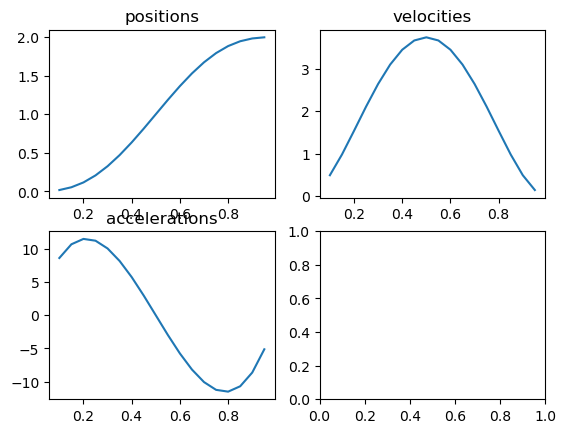

In [42]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 2)

ax1[0].set_title("positions")
ax1[0].plot(timestamps, positions)
ax1[1].set_title("velocities")
ax1[1].plot(timestamps, velocities)
ax2[0].set_title("accelerations")
ax2[0].plot(timestamps, accelerations)
